# Lab-5

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# Create a dictionary with the data
data = {
    'salary': [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    'experience': [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('salary_data.csv', index=False)


# Q1

Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
between beta and mean squared error(MSE) for each case.

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
beta and mean squared error(MSE).

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
beta and mean squared error(MSE).

d. Use the scikit learn and compare the results of MSE.

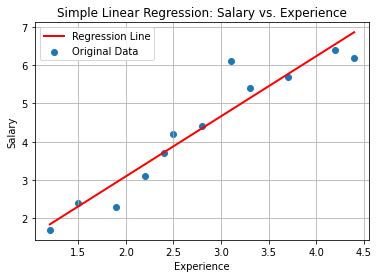

Linear Regression Equation: Salary = 1.57 * Experience + -0.04
Slope (b1): 1.5670982931135966
Intercept (b0): -0.03563861094761833
Mean Squared Error (MSE) using scikit-learn: 0.23366710810280555


In [33]:
# Load the data
data = pd.read_csv("salary_data.csv")

x = data['experience'].values.reshape(-1, 1)
y = data['salary'].values.reshape(-1, 1)

x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate the slope and intercept of the regression line
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - (slope * x_mean)

predicted_salary = slope * x + intercept

# Scatter plot of the original data
plt.scatter(x, y, label="Original Data")

# Plot the regression line
plt.plot(x, predicted_salary, color='red', linewidth=2, label="Regression Line")

# Add labels and a legend
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: Salary vs. Experience")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Print the linear regression equation, slope, and intercept
print(f"Linear Regression Equation: Salary = {slope:.2f} * Experience + {intercept:.2f}")
print(f"Slope (b1): {slope:}")
print(f"Intercept (b0): {intercept:}")

# Fit a linear regression model using scikit-learn
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

# Calculate Mean Squared Error (MSE) using scikit-learn
mse_scikit = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE) using scikit-learn: {mse_scikit:}")


## Q1)a)


a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.


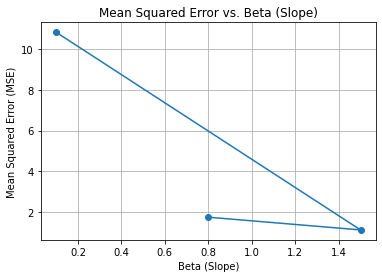

In [14]:
# Define a fixed intercept value
b = 1.1

# Define a list of different beta (slope) values to test
beta_values = [0.1, 1.5, 0.8]

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(beta, intercept, x, y):
    y_pred = beta * x + intercept
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Create an empty list to store MSE values for different beta values
mse_values = []

# Iterate through beta values, calculate MSE, and store in mse_values
for beta in beta_values:
    mse = calculate_mse(beta, b, x, y)
    mse_values.append(mse)

# Create a plot of beta values against MSE values
plt.plot(beta_values, mse_values, marker='o')

# Add labels
plt.xlabel("Beta (Slope)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Beta (Slope)")

# Display the plot
plt.grid(True)
plt.show()


## Q1)b) 

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

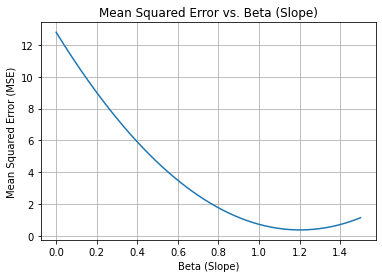

In [15]:
# Define a fixed intercept value
b = 1.1

# Generate a range of beta (slope) values from 0 to 1.5 with a step of 0.01
beta_values = np.arange(0, 1.51, 0.01)

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(beta, intercept, x, y):
    y_pred = beta * x + intercept
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Create an empty list to store MSE values for different beta values
mse_values = []

# Iterate through beta values, calculate MSE, and store in mse_values
for beta in beta_values:
    mse = calculate_mse(beta, b, x, y)
    mse_values.append(mse)

# Create a plot of beta values against MSE values
plt.plot(beta_values, mse_values)

# Add labels
plt.xlabel("Beta (Slope)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Beta (Slope)")

# Display the plot
plt.grid(True)
plt.show()


## Q1)c)


c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

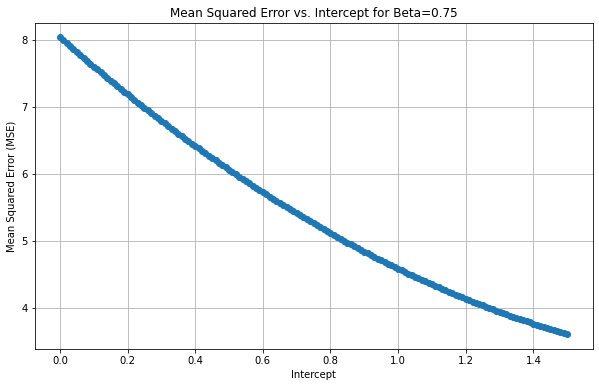

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of intercept values from 0.0 to 1.5 with a step of 0.01
intercepts = np.arange(0.0, 1.51, 0.01)

# Set the fixed beta value
beta = 0.75

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(intercept, x, y):
    y_pred = beta * x + intercept
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Create a list to store MSE values for different intercepts
mse_values = []

# Iterate through intercept values and calculate MSE for each intercept
for intercept in intercepts:
    mse = calculate_mse(intercept, x, y)
    mse_values.append(mse)

# Create a figure and plot MSE values for different intercepts with the fixed beta
plt.figure(figsize=(10, 6))
plt.plot(intercepts, mse_values, marker='o')
plt.xlabel("Intercept")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Intercept for Beta=0.75")
plt.grid(True)
plt.show()


## Q1)d) 

d. Use the scikit learn and compare the results of MSE.

Beta (Slope): 0.00 | MSE (Manual): 21.041667 | MSE (scikit-learn): 21.349429
Beta (Slope): 0.10 | MSE (Manual): 18.452483 | MSE (scikit-learn): 18.740525
Beta (Slope): 0.20 | MSE (Manual): 16.035267 | MSE (scikit-learn): 16.303589
Beta (Slope): 0.30 | MSE (Manual): 13.790017 | MSE (scikit-learn): 14.038619
Beta (Slope): 0.40 | MSE (Manual): 11.716733 | MSE (scikit-learn): 11.945615
Beta (Slope): 0.50 | MSE (Manual): 9.815417 | MSE (scikit-learn): 10.024579
Beta (Slope): 0.60 | MSE (Manual): 8.086067 | MSE (scikit-learn): 8.275509
Beta (Slope): 0.70 | MSE (Manual): 6.528683 | MSE (scikit-learn): 6.698405
Beta (Slope): 0.80 | MSE (Manual): 5.143267 | MSE (scikit-learn): 5.293269
Beta (Slope): 0.90 | MSE (Manual): 3.929817 | MSE (scikit-learn): 4.060099
Beta (Slope): 1.00 | MSE (Manual): 2.888333 | MSE (scikit-learn): 2.998895
Beta (Slope): 1.10 | MSE (Manual): 2.018817 | MSE (scikit-learn): 2.109658
Beta (Slope): 1.20 | MSE (Manual): 1.321267 | MSE (scikit-learn): 1.392388
Beta (Slope): 

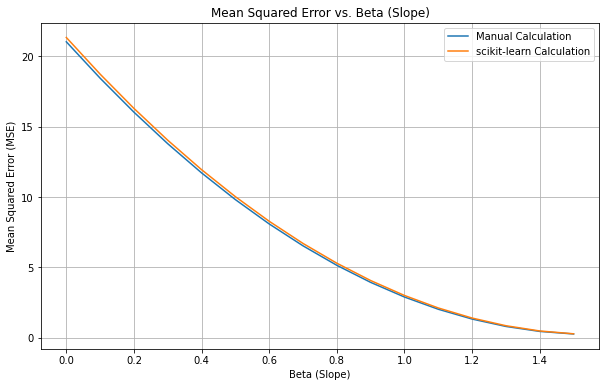

In [17]:
# Generate a range of beta (slope) values from 0 to 1.5 with a step of 0.1
beta_values = np.arange(0, 1.51, 0.1)

# Create empty lists to store MSE values calculated manually and using scikit-learn
mse_values_manual = []
mse_values_scikit = []

# Iterate through different beta values
for beta in beta_values:
    # Manual calculation of MSE
    y_pred_manual = beta * x
    mse_manual = mean_squared_error(y, y_pred_manual)
    mse_values_manual.append(mse_manual)
    
    # Create a Linear Regression model using scikit-learn
    model = LinearRegression()
    model.fit(x, y)
    model.coef_ = np.array([beta])
    
    # Predict salaries using scikit-learn
    y_pred_scikit = model.predict(x)
    
    # Calculate the MSE using scikit-learn
    mse_scikit = mean_squared_error(y, y_pred_scikit)
    mse_values_scikit.append(mse_scikit)
    
    # Print beta, manual MSE, and scikit-learn MSE for each iteration
    print(f"Beta (Slope): {beta:.2f} | MSE (Manual): {mse_manual:.6f} | MSE (scikit-learn): {mse_scikit:.6f}")

# Plot beta vs. MSE for both manual and scikit-learn calculations
plt.figure(figsize=(10, 6))
plt.plot(beta_values, mse_values_manual, label="Manual Calculation")
plt.plot(beta_values, mse_values_scikit, label="scikit-learn Calculation")
plt.xlabel("Beta (Slope)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Beta (Slope)")
plt.legend()
plt.grid(True)
plt.show()


# Q2

Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error
for 60 iterations of 5 epochs.

a. Plot the graph of error versus iteration.

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

## Q2)a) 

a. Plot the graph of error versus iteration.

B0: [0.47495749], B1: [1.39382752], MSE: [8.75703013 5.56333106 5.95957379 3.34963199 2.23217564 1.85096201
 1.83847656 4.96235024 2.97604931 3.70732114 6.11362207 5.32610752]


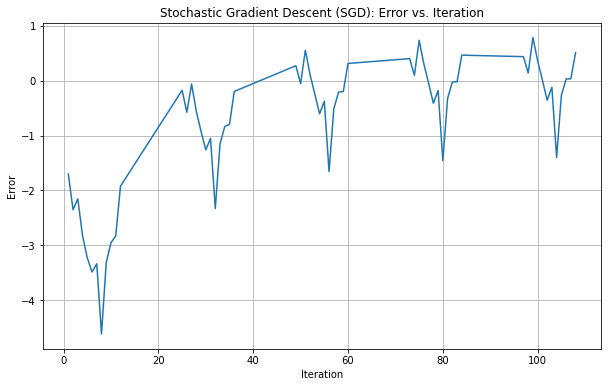

In [49]:
# Initialize initial values for coefficients and learning rate
b0 = 0.0
b1 = 0.0
alpha = 0.01

# Create lists to store error values and iteration numbers
err = []
iteration_values = []

# Perform 5 iterations
for i in range(5):
    # Iterate through each data point
    for x_, y_ in zip(x, y):
        # Calculate the predicted value using the current coefficients
        pred = b0 + b1 * x_
        
        # Calculate the error (delta) between predicted and actual values
        delta = pred - y_
        
        # Append error and iteration number
        err.append(delta)
        iteration_values.append((i * len(x)) + len(err))
        
        # Update coefficients using gradient descent
        b0 -= alpha * delta
        b1 -= alpha * delta * x_

# Calculate the Mean Squared Error (MSE)
mse = sum(list(map(lambda n: n**2, [b0 + b1 * _ for _ in x] - y))) / len(x)

# Print the final coefficients and MSE
print(f'B0: {b0}, B1: {b1}, MSE: {mse:}')

# Plot error vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(iteration_values, err)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Stochastic Gradient Descent (SGD): Error vs. Iteration")
plt.grid(True)
plt.show()


## Q2)b) 

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

In [39]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

x = x.reshape(-1, 1)
y = y.ravel()

# Create an SGDRegressor model with specified parameters
sgd = SGDRegressor(alpha=0.01, max_iter=12)

# Lists to store intercept, slope, and MSE values for each epoch
intercepts = []
slopes = []
mses = []

# Perform 5 epochs (12 iterations each)
epochs = 5
for epoch in range(epochs):
    # Fit the model to the data for 12 iterations (max_iter)
    sgd.fit(x, y)

    # Get the intercept (B0) and slope (B1) values from the trained model
    intercept = sgd.intercept_[0]
    slope = sgd.coef_[0]

    predictions = sgd.predict(x)
    mse = mean_squared_error(y, predictions)

    # Append intercept, slope, and MSE to respective lists
    intercepts.append(intercept)
    slopes.append(slope)
    mses.append(mse)

    print(f'Epoch {epoch + 1}:')
    print(f'Intercept (B0): {intercept:}')
    print(f'Slope (B1): {slope:}')
    print(f'Mean Squared Error (MSE): {mse:}')
    print()

# Print the final values after 5 epochs
print(f'Final Values After {epochs} Epochs:')
print(f'Intercept (B0): {intercepts[-1]:}')
print(f'Slope (B1): {slopes[-1]:}')
print(f'Final Mean Squared Error (MSE): {mses[-1]:}')

Epoch 1:
Intercept (B0): 0.43811771361243285
Slope (B1): 1.4027373192534096
Mean Squared Error (MSE): 0.259527746423663

Epoch 2:
Intercept (B0): 0.43193323195449557
Slope (B1): 1.4052431864933685
Mean Squared Error (MSE): 0.25878519686759865

Epoch 3:
Intercept (B0): 0.424368019429681
Slope (B1): 1.411407811278539
Mean Squared Error (MSE): 0.25740284855278267

Epoch 4:
Intercept (B0): 0.43493222109296054
Slope (B1): 1.4028240740175306
Mean Squared Error (MSE): 0.2593974402900387

Epoch 5:
Intercept (B0): 0.43415077301415395
Slope (B1): 1.4022057777364352
Mean Squared Error (MSE): 0.2595156143341563

Final Values After 5 Epochs:
Intercept (B0): 0.43415077301415395
Slope (B1): 1.4022057777364352
Final Mean Squared Error (MSE): 0.2595156143341563


## Q2)c) 

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

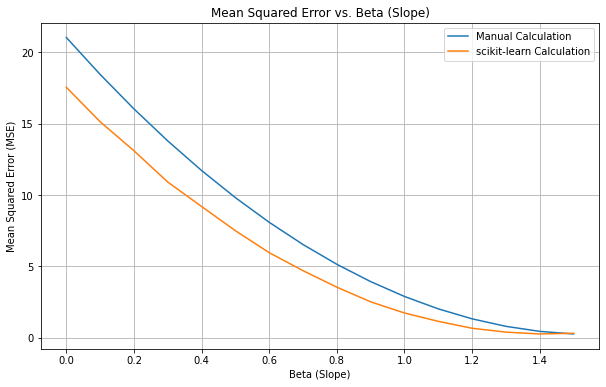

In [40]:
# Generate a range of beta (slope) values from 0 to 1.6 with a step of 0.1
beta_values = np.arange(0, 1.6, 0.1)

# Create empty lists to store MSE values for manual and scikit-learn calculations
mse_values_manual = []
mse_values_scikit = []

# Iterate through beta values and calculate MSE for each
for beta in beta_values:
    # Manual calculation of MSE
    y_pred_manual = beta * x
    mse_manual = mean_squared_error(y, y_pred_manual)
    mse_values_manual.append(mse_manual)
    
    # Create an SGDRegressor model with specified parameters
    sgd = SGDRegressor(alpha=0.01, max_iter=60)
    
    # Train the model on the data
    sgd.fit(x, y.ravel())
    
    # Update the model's coefficient (beta) to the current value
    sgd.coef_ = np.array([beta])
    
    predictions = sgd.predict(x)
    
    # Calculate the MSE using scikit-learn
    mse_scikit = mean_squared_error(y, predictions)
    mse_values_scikit.append(mse_scikit)

# Plot beta values against MSE values for manual and scikit-learn calculations
plt.figure(figsize=(10, 6))
plt.plot(beta_values, mse_values_manual, label="Manual Calculation")
plt.plot(beta_values, mse_values_scikit, label="scikit-learn Calculation")
plt.xlabel("Beta (Slope)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Beta (Slope)")
plt.legend()
plt.grid(True)
plt.show()